In [ ]:
!pip install patool

content = "/content/drive/MyDrive/image.rar"

In [ ]:
import tensorflow as tf

import patoolib, os

patoolib.extract_archive(content, outdir=".")

In [ ]:
import tensorflow.keras.utils as utils

import tensorflow.keras.applications as applications

import patoolib, os, warnings

warnings.filterwarnings("ignore")

In [ ]:
rooter = "/content/image"

classes = os.listdir(rooter)

classes

['pria', 'perempuan']

In [ ]:
i = len(os.listdir(os.path.join(rooter, "pria")))

j = len(os.listdir(os.path.join(rooter, "perempuan")))

total = i + j

total

878

In [ ]:
subset = "both"; label = "binary"

image = (160, 160); split = 0.15; random = 18

orifile = utils.image_dataset_from_directory(
  rooter,
  seed = random,
  subset = subset,
  image_size = image,
  label_mode = label,
  batch_size = random,
  validation_split = split
)

train, testi = orifile

In [ ]:
input_shape = (160, 160, 3)

ontrue = !False

intnet = applications.EfficientNetB5(
  weights="imagenet",
  include_top=False,
  input_shape=input_shape
)

for layer in intnet.layers[15:] : layer.trainable = ontrue

In [ ]:
from tensorflow.keras.callbacks import Callback

class Matrit(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get("accuracy") >= 0.93 and logs.get("val_accuracy") >= 0.93:
      self.model.stop_training = True

callbacks = Matrit()

In [ ]:
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import RandomFlip, RandomRotation

from tensorflow.keras.layers import RandomZoom, RandomContrast, RandomTranslation

intput = Sequential([
  RandomFlip("horizontal_and_vertical", input_shape=input_shape),
  RandomRotation(0.2),
  RandomZoom(0.2),
  RandomContrast(0.2),
  RandomTranslation(height_factor=0.2, width_factor=0.2)
])

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

model = tf.keras.models.Sequential([
  intput,
  intnet,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
plot = model.fit(train, validation_data=testi, epochs=10, callbacks=[callbacks])

In [ ]:
model.evaluate(train)

[0.08931760489940643, 0.9772422909736633]

In [ ]:
model.evaluate(testi)

[0.1832124888896942, 0.9312977194786072]

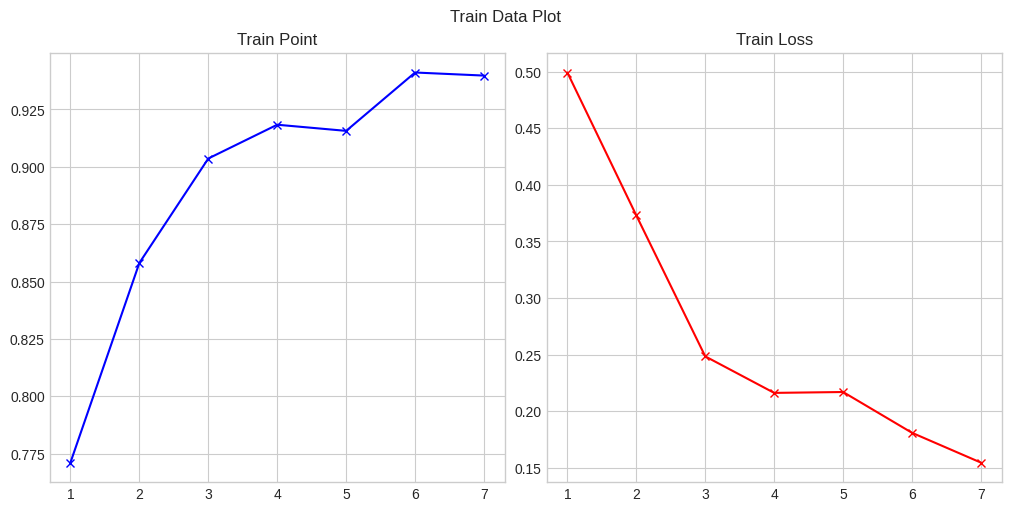

In [ ]:
plot = Helplot(plot, "accuracy")

plot.trainplot

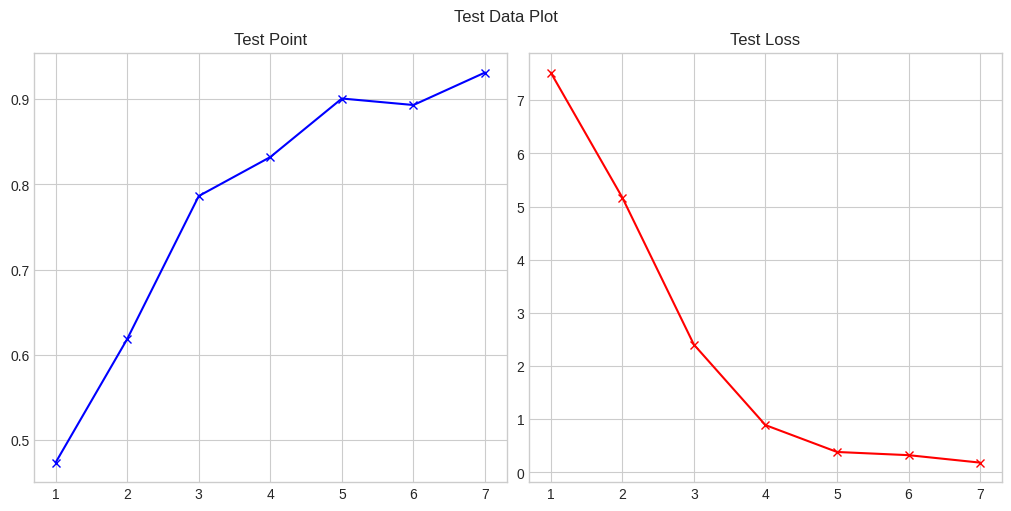

In [ ]:
plot.testiplot

In [ ]:
import numpy

t = "/content/image/perempuan/perempuan (280).jpg"

def output(t, input_shape=(160, 160, 3)):
  i = utils.load_img(t, target_size=input_shape)
  i = utils.img_to_array(i)
  i = tf.expand_dims(i, axis=0)
  j = model.predict(i, verbose=0)
  result = "Male" if numpy.round(j) == 1 else "Female"
  return result

output(t)

'Female'

In [ ]:
t = "/content/image/pria/pria (105).jpg"

output(t)

'Male'

In [ ]:
t = "/content/image/pria/pria (114).jpg"

output(t)

'Male'

In [ ]:
t = "/content/image/pria/pria (126).jpg"

output(t)

'Male'

In [ ]:
t = "/content/image/perempuan/perempuan (132).jpg"

output(t)

'Female'

In [ ]:
t = "/content/image/perempuan/perempuan (138).jpg"

output(t)

'Female'